<a href="https://colab.research.google.com/github/shoutingraven369/Housing-dataset/blob/main/housing_El_task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from category_encoders import OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.pipeline import make_pipeline

In [50]:
pip install category_encoders

In [51]:
df=pd.read_csv('/content/Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [52]:
num_cols=df.select_dtypes("number")

cat_col=df.select_dtypes("object")
cat_col.astype("category")

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
0,yes,no,no,no,yes,yes,furnished
1,yes,no,no,no,yes,no,furnished
2,yes,no,yes,no,no,yes,semi-furnished
3,yes,no,yes,no,yes,yes,furnished
4,yes,yes,yes,no,yes,no,furnished
...,...,...,...,...,...,...,...
540,yes,no,yes,no,no,no,unfurnished
541,no,no,no,no,no,no,semi-furnished
542,yes,no,no,no,no,no,unfurnished
543,no,no,no,no,no,no,furnished


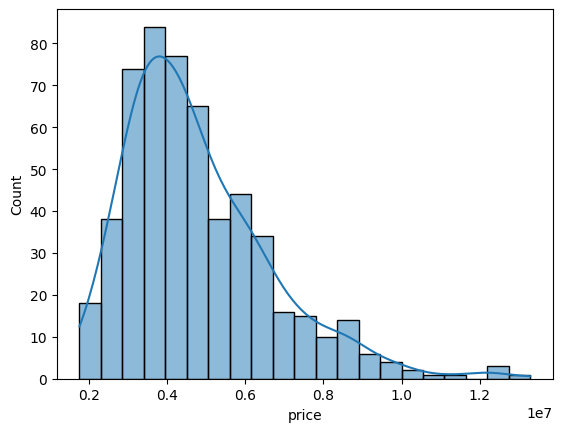

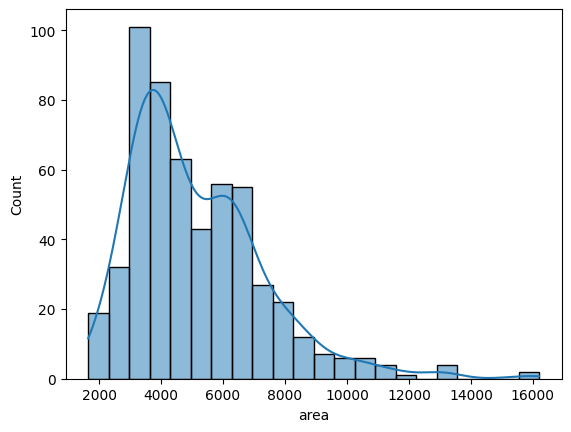

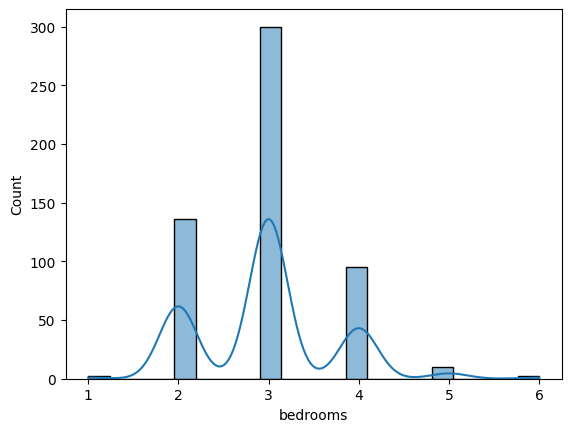

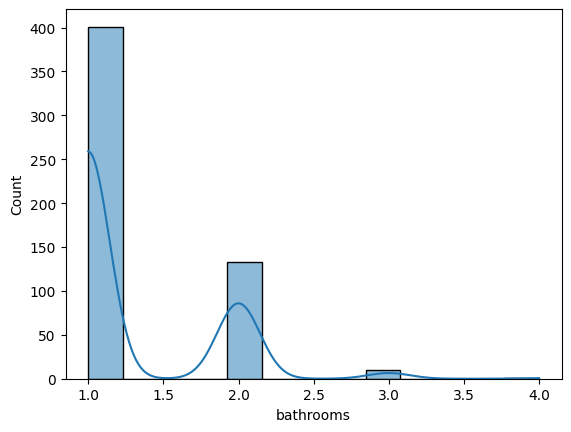

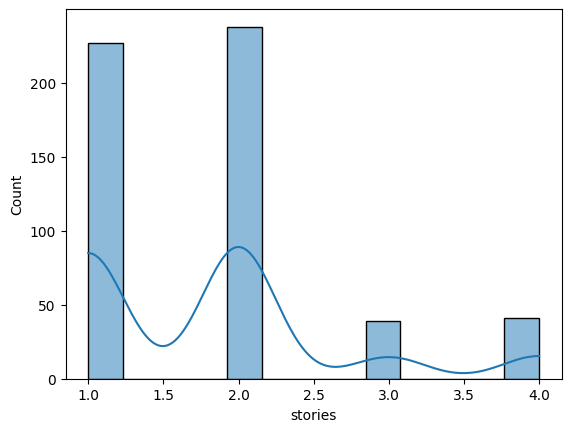

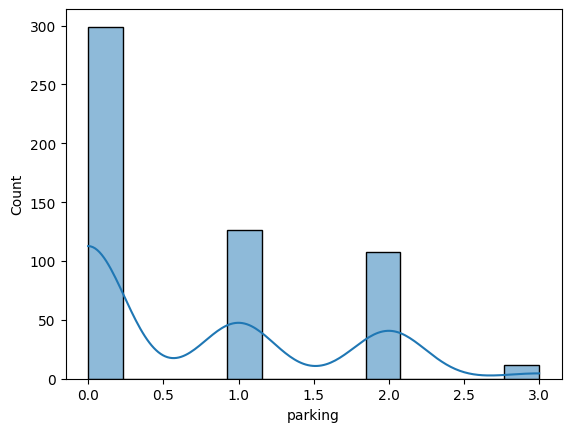

<Figure size 640x480 with 0 Axes>

In [53]:
for col in num_cols:
  sns.histplot(df[col],kde=True)
  plt.xlabel(col)
  plt.show()
  plt.clf()

<Axes: >

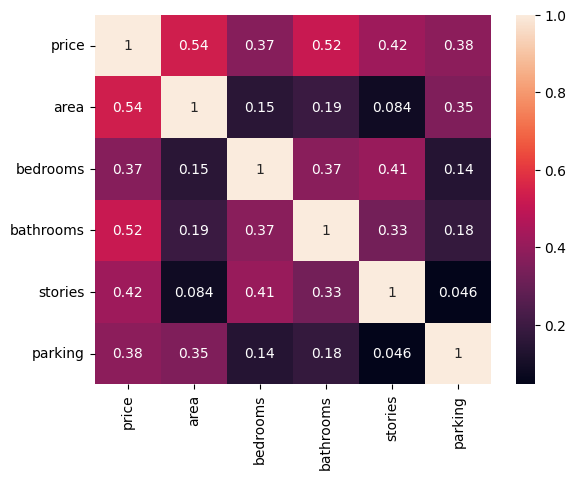

In [54]:
corr= num_cols.corr()
sns.heatmap(corr,annot=True)



In [55]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [56]:
target= "price"
features = ["area","bedrooms","bathrooms","stories","mainroad","guestroom","basement",	"hotwaterheating",	"airconditioning",	"parking",	"prefarea",	"furnishingstatus"]
y_train=df[target]
X_train=df[features]
X_train.shape

(545, 12)

In [57]:
y_mean=y_train.mean()
y_pred_train=[y_mean]*len(y_train)
print("mean price:",round(y_mean,2))
print("baseline;",round(mean_absolute_error(y_train, y_pred_train),2))

mean price: 4766729.25
baseline; 1440702.92


In [58]:
model=make_pipeline(OneHotEncoder(use_cat_names=True),
                    Ridge())
model.fit(X_train,y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['mainroad', 'guestroom', 'basement',
                                     'hotwaterheating', 'airconditioning',
                                     'prefarea', 'furnishingstatus'],
                               use_cat_names=True)),
                ('ridge', Ridge())])

In [64]:
y_pred_training=model.predict(X_train)
print("Training MAE:",round(mean_absolute_error(y_train, y_pred_training),2))
print("Training MSE:",round(mean_squared_error(y_train, y_pred_training),2))

Training MAE: 774725.12
Training MSE: 1111220881555.33


,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
